In [81]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [82]:
# Target function
f = lambda x: 1.0/3.0 * x + 5.0

In [83]:
x = np.linspace(-20, 60, 50)
fx = f(x)

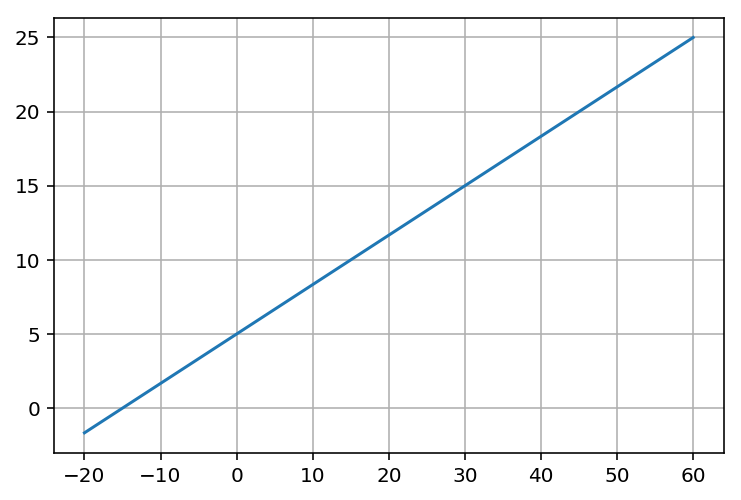

In [84]:
plt.plot(x,fx)
plt.grid()
plt.show()

In [85]:
np.random.rand(len(x))

array([0.22162222, 0.55241761, 0.77607676, 0.94241699, 0.68436889,
       0.07487555, 0.9904552 , 0.64747852, 0.52222237, 0.97226276,
       0.80369444, 0.40487   , 0.8319752 , 0.79798209, 0.07452356,
       0.84087551, 0.25249506, 0.11268457, 0.55812323, 0.40016617,
       0.39606052, 0.35881158, 0.784379  , 0.53006919, 0.53414028,
       0.34808081, 0.26446201, 0.03930874, 0.87117495, 0.82617714,
       0.73416885, 0.50378277, 0.25046393, 0.03440702, 0.47199862,
       0.84932863, 0.66910602, 0.66548989, 0.7633538 , 0.00972691,
       0.92136184, 0.34222836, 0.58769382, 0.64398996, 0.17972265,
       0.75620788, 0.8282531 , 0.83940794, 0.02915008, 0.18711135])

In [86]:
# add random noise
np.random.seed(306)
y = fx + 10 * np.random.rand(len(x))

In [87]:
y

array([ 1.23417873,  8.42748653,  2.66258488,  4.86301187,  9.28297873,
        9.07977987, 11.5706212 ,  5.590411  , 12.24848885, 10.27195786,
       13.17186391,  7.34283856, 10.93091412, 10.63869333, 14.77657741,
        7.21765489, 10.05893823,  8.78022248, 10.59759331,  8.87569688,
       10.13485949, 10.88508438, 15.65292735, 17.55699425, 17.71717514,
       21.91320127, 13.81658182, 21.93137996, 23.37363301, 21.35468375,
       21.1836223 , 20.16319426, 22.21789667, 21.12522586, 24.63801299,
       17.78004083, 23.63284625, 18.82541421, 25.09434905, 28.46488099,
       20.82790338, 25.2370242 , 22.92115849, 23.4555641 , 27.67440238,
       23.8209732 , 28.60283558, 32.0462794 , 31.9662531 , 33.22309671])

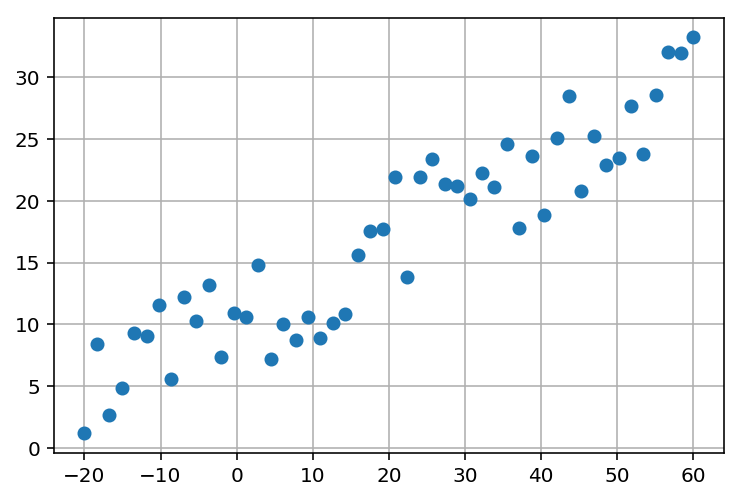

In [88]:
plt.plot(x,y, 'o')
plt.grid()
plt.show()

## 프로그램 실습 : 선형 회귀
주어진 데이터 $(x_i, y_i)$ for $i=1, 50$에 대하여 아래 loss function을 최소화하는 $a$와 $b$를 구하시오.
\begin{equation}
\min_{a,b} \sum_{i=1}^{50}|ax_i+b - y_i|^2
\end{equation}

### Version 1 : Steepest Descent

1. `from numerical_optimizer import something`
1. Define loss function
1. Define grad function
1. (Optional) Define hess function
1. Tunning Parameter
    1. learning_rate
    1. MaxIter

sumpy 편미분

In [56]:
import sympy
u, v = sympy.symbols('u v')
f1 = (u * 5 + v - 6)**2
# 변수로 둘 것은 x, y 가 아닌 u, v 이고 x,y 는 임의상수 설정

In [57]:
sympy.diff(f1, v)
# 2(u5 + v - 6)

10*u + 2*v - 12

In [153]:
def loss(a, b):
    return np.sum((a * x + b - y)**2)
    
def grad_a(a, b):
    return np.sum(2 * x * (a * x + b -y)) 

def grad_b(a, b):
    return np.sum(2 * (a * x + b - y))

In [147]:
def steepest_descent_2d(func, gradx, grady, x0, MaxIter=10, learning_rate=0.25, verbose=True):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]
    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        x1 = x0 - learning_rate * grad
        fval = func(*x0)
        if verbose:
            print(i, x0, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

In [154]:
a_0 = .3
b_0 = -.3
from numerical_optimizers import steepest_descent_2d

In [138]:
# TODO
w0 = np.array([a_0, b_0])
wopt, _, _, _ = steepest_descent_2d(loss, grad_a, grad_b, w0, 
                                    verbose=True, learning_rate=1E-2, MaxIter=10)
print(wopt)

0 [ 0.3 10.5] 489.4235689062677
1 [18.2938544  10.89719974] 15444487.420949932
2 [-17157.62334955   -348.97988834] 14071204651118.29
3 [16377617.57559747   343169.36419075] 1.2820422708414575e+19
4 [-1.56327812e+10 -3.27552335e+08] 1.1680822111764825e+25
5 [1.49218195e+13 3.12655625e+11] 1.064252000966722e+31
6 [-1.42431916e+16 -2.98436390e+14] 9.696512032495494e+36
7 [1.35954269e+19 2.84863831e+17] 8.834594204279056e+42
8 [-1.29771218e+22 -2.71908537e+20] 8.049291796134054e+48
9 [1.23869366e+25 2.59542436e+23] 7.333794503875374e+54
[-1.18235923e+28 -2.47738731e+26]


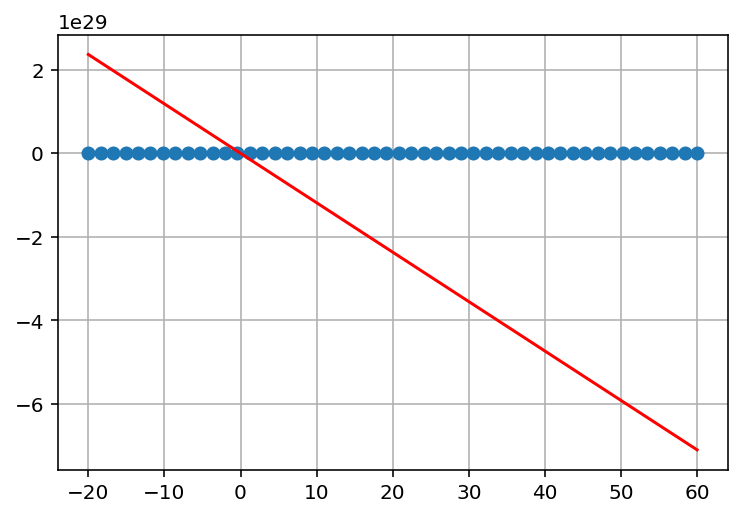

In [139]:
a_opt = wopt[0]
b_opt = wopt[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()

### Version 2 : Newton Method

In [155]:
def hess_loss(a, b):
    return np.array([[np.sum(2 * x * x), np.sum(2 * x )],[np.sum(2 * x ),2 * 50.]])

In [151]:
def newton_descent_2d(func, gradx, grady, hessian, x0, MaxIter=10, learning_rate=1.0, verbose=True):
    paths = [x0]
    fval_paths = [func(x0[0], x0[1])]
    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        hess = hessian(x0[0], x0[1])
        x1 = x0 - learning_rate * np.linalg.solve(hess, grad)
        fval = func(*x0)
        if verbose:
            print(i, x0, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

In [156]:
from numerical_optimizers import newton_descent_2d
wopt, _, _, _ = newton_descent_2d(loss, grad_a, grad_b, hess_loss, w0, 
                                    verbose=False, learning_rate=1, MaxIter=1)
print(wopt)

[ 0.31810453 10.53510921]


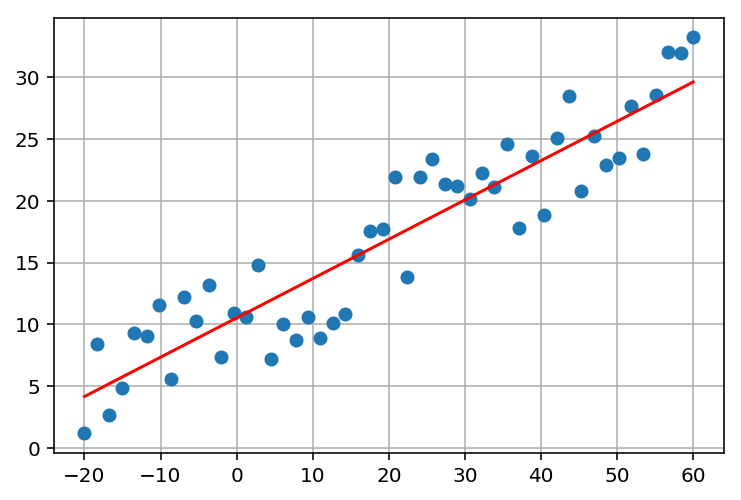

In [157]:
a_opt = wopt[0]
b_opt = wopt[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()

In [158]:
# loss 함수를 (a,b) 대신 w 벡터로 표현
def loss(w):
    return np.sum( (w[0] * x + w[1] - y)**2 )

In [124]:
from scipy.optimize import minimize
res = minimize(loss, w0)
print(res)

      fun: 472.4377897592989
 hess_inv: array([[ 1.80147060e-05, -3.60294126e-04],
       [-3.60294126e-04,  1.72058828e-02]])
      jac: array([0.00000000e+00, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.31810451, 10.53510956])


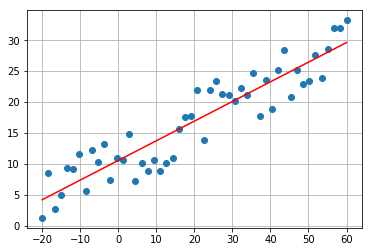

In [17]:
a_opt = res.x[0]
b_opt = res.x[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()

     fun: 472.4377897592965
     jac: array([  7.62939453e-06,  -3.81469727e-06])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 10
    njev: 21
  status: 0
 success: True
       x: array([  0.31810451,  10.53510941])


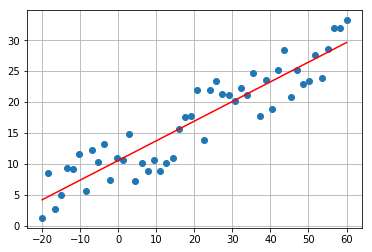

In [18]:
from scipy.optimize import minimize
res = minimize(loss, w0, method='CG')

print(res)

a_opt = res.x[0]
b_opt = res.x[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()